In [65]:
import pandas as pd
import numpy as np
import os
import sklearn.preprocessing

In [66]:
path = r'/Users/sujiaqi/Desktop/last semester courses/jgl/project/ticks_201910'
list_VXX = []
list_SPY = []
for (root, dirs, files) in os.walk(path):
    for file in files:
        Dr_type = file.split("_")[1]
        #print(Dr_type)
        if Dr_type == 'VXX':
            list_VXX.append(file)
        elif Dr_type == 'SPY':
            list_SPY.append(file)
#data = pd.read_csv(path + 'tick_VXX_20191010.txt', header = None)

In [67]:
list_SPY.sort()
list_VXX.sort()

In [68]:
prices_VXX = []
times_VXX = []
for vxx in list_VXX:
    data = pd.read_csv(path + os.sep + vxx, header = None)
    price = data.iloc[:, 5]
    dates = data.iloc[:, 0]
    for i in range(0, len(price)):
        prices_VXX.append(price[i])
        #times_VXX.append(dates[i].split(" ")[1].split(".")[0])
        times_VXX.append(dates[i].split(".")[0])

In [69]:
len(times_VXX)


37840

In [70]:
prices_SPY = []
times_SPY = []
for spy in list_SPY:
    data = pd.read_csv(path + os.sep + spy, header = None)
    price = data.iloc[:, 5]
    dates = data.iloc[:, 0]
    for i in range(0, len(price)):
        prices_SPY.append(price[i])
        times_SPY.append(dates[i].split(".")[0])

In [74]:
len(times_SPY)
prices_SPY = sklearn.preprocessing.scale(prices_SPY)
prices_VXX = sklearn.preprocessing.scale(prices_VXX)

In [75]:
df_VXX = pd.DataFrame(list(zip(pd.to_datetime(times_VXX), prices_VXX)), 
               columns =['Date', 'Price'])

df_SPY = pd.DataFrame(list(zip(pd.to_datetime(times_SPY), prices_SPY)), 
               columns =['Date', 'Price'])

In [76]:
df_VXX.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [77]:
df_VXX.tail(3)

,Date,Price
37837,2019-11-01 19:59:28,-1.566239
37838,2019-11-01 19:59:29,-1.566239
37839,2019-11-01 19:59:33,-1.566239


In [78]:
df_VXX.head(3)

,Date,Price
0,2019-10-01 13:30:00,0.266302
1,2019-10-01 13:30:00,0.266302
2,2019-10-01 13:30:00,0.266302


In [79]:
df_VXX = df_VXX.set_index('Date')
df_VXX.head(3)

,Price
Date,
2019-10-01 13:30:00,0.266302
2019-10-01 13:30:00,0.266302
2019-10-01 13:30:00,0.266302


In [80]:
df_SPY = df_SPY.set_index('Date')

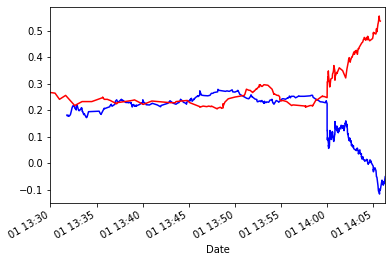

In [103]:
import matplotlib.pyplot as plt
#plt.plot(df_SPY['Price'][100:1000], df_SPY['Date'][100:1000], color='blue')
#plt.plot(df_VXX['Price'][:300], color='red')
df_SPY['Price'][100:1000].plot(color='blue')
df_VXX['Price'][:300].plot(color='red')

In [15]:
changes_SPY = []
for i in range(0, len(prices_SPY)-1):
    change = abs((prices_SPY[i+1] - prices_SPY[i])/prices_SPY[i])
    changes_SPY.append(change)

In [16]:
changes_VXX = []
for i in range(0, len(prices_VXX)-1):
    change = abs((prices_VXX[i+1] - prices_VXX[i])/prices_VXX[i])
    changes_VXX.append(change)

In [57]:
L_VXX = []
for i in range(0, len(changes_VXX)):
    if changes_VXX[i] > 0.006:
        L_VXX.append(i)

In [58]:
len(L_VXX)

30

In [59]:
L_SPY = []
for i in range(0, len(changes_SPY)):
    if changes_SPY[i] > 0.001:
        L_SPY.append(i)

In [60]:
len(L_SPY)

35

In [52]:
T_VXX = []
T_SPY = []
for i in range(0, len(L_VXX)):
    T_VXX.append(times_VXX[L_VXX[i]])
for i in range(0, len(L_SPY)):
    T_SPY.append(times_SPY[L_SPY[i]])

In [53]:
T_VXX

['2019-10-01 14:06:46',
 '2019-10-01 20:13:37',
 '2019-10-03 13:59:39',
 '2019-10-03 14:00:15',
 '2019-10-03 20:00:03',
 '2019-10-04 13:31:03',
 '2019-10-04 20:19:39',
 '2019-10-07 14:58:16',
 '2019-10-08 15:14:06',
 '2019-10-08 18:57:36',
 '2019-10-08 20:14:17',
 '2019-10-08 20:54:48',
 '2019-10-09 15:13:59',
 '2019-10-10 20:00:24',
 '2019-10-10 20:40:42',
 '2019-10-14 19:59:49',
 '2019-10-14 20:18:50',
 '2019-10-16 19:59:58',
 '2019-10-17 13:31:24',
 '2019-10-17 20:13:57',
 '2019-10-18 19:59:54',
 '2019-10-21 19:59:51',
 '2019-10-22 19:59:53',
 '2019-10-23 19:59:44',
 '2019-10-24 15:47:02',
 '2019-10-24 19:59:50',
 '2019-10-25 20:14:45',
 '2019-10-28 19:59:48',
 '2019-10-30 19:59:56',
 '2019-10-31 19:59:49']

In [54]:
T_SPY

['2019-10-01 20:42:13',
 '2019-10-02 20:05:09',
 '2019-10-03 14:00:00',
 '2019-10-03 14:00:00',
 '2019-10-03 14:00:00',
 '2019-10-03 14:00:00',
 '2019-10-03 14:26:17',
 '2019-10-03 20:05:41',
 '2019-10-04 12:15:51',
 '2019-10-04 20:26:30',
 '2019-10-07 14:57:52',
 '2019-10-08 20:56:33',
 '2019-10-09 15:13:56',
 '2019-10-10 13:21:58',
 '2019-10-10 20:14:00',
 '2019-10-10 20:34:41',
 '2019-10-10 20:56:46',
 '2019-10-11 17:26:50',
 '2019-10-11 20:39:58',
 '2019-10-14 20:43:49',
 '2019-10-15 20:31:02',
 '2019-10-16 12:42:51',
 '2019-10-16 20:39:38',
 '2019-10-18 13:02:49',
 '2019-10-18 20:44:22',
 '2019-10-21 20:42:28',
 '2019-10-22 20:18:56',
 '2019-10-22 20:46:14',
 '2019-10-23 20:56:44',
 '2019-10-24 20:01:54',
 '2019-10-25 20:40:24',
 '2019-10-30 18:00:01',
 '2019-10-30 18:00:01',
 '2019-10-30 20:54:10',
 '2019-10-31 20:45:02']

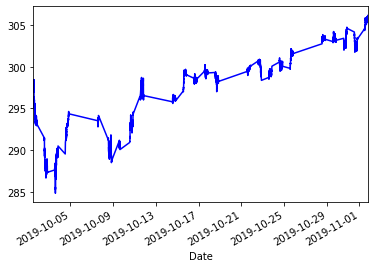

In [61]:
df_SPY['Price'].plot(color='blue')

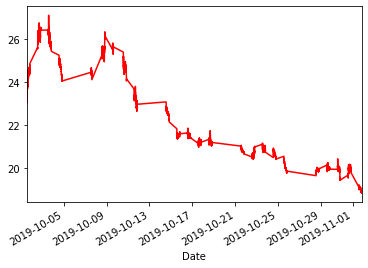

In [62]:
df_VXX['Price'].plot(color='red')